In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [26]:
df = pd.read_csv('/content/AmazonProductReviewsData.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [27]:
df.shape

(10000, 2)

In [28]:
df.duplicated().sum()

0

In [29]:
df['review'][11]

'Great book: This was a great book,I just could not put it down,and could not read it fast enough. Boy what a book the twist and turns in this just keeps you guessing and wanting to know what is going to happen next. This book makes you fall in love and can heat you up,it can also make you so angery. this book can make you go throu several of your emotions. This is a quick read romance. It is something that you will want to end your day off with if you read at night.'

In [30]:
df['review'][121]

'letters from home: i like letters from home cuz it tells a story that if you really listen you can acctually hear john michael montgomery tell his story of soldiers and all that stuffi liked it and i like punk rock and rock so it must be good if i like it'

In [31]:
df['label'].value_counts()

,count
label,
neg,5097
pos,4903


In [32]:
df.isnull().sum()

,0
label,0
review,0


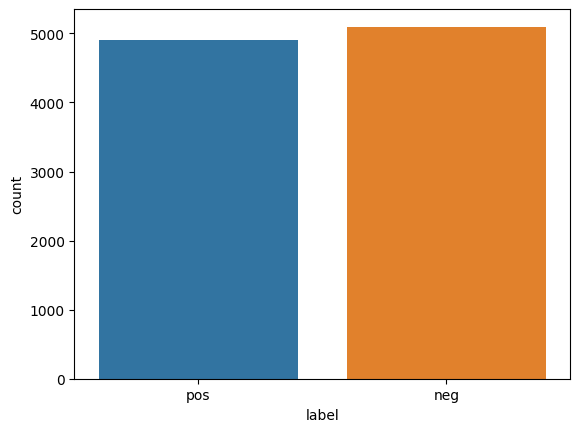

In [34]:
sns.countplot(x = 'label', data = df, hue = 'label')
plt.show()

In [35]:
from tqdm import tqdm

cleaned_reviews = []

for sentence in tqdm(df['review'].values):
  sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)
  sentence = sentence.lower().strip()
  sentence_words = [word for word in sentence.split() if word not in stopwords.words('english')]
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in sentence_words]
  cleaned_reviews.append(' '.join(lemmatized_words))



100%|██████████| 10000/10000 [01:36<00:00, 103.17it/s]


In [36]:
cleaned_reviews

['stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen',
 'best soundtrack ever anything reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny',
 'amazing soundtrack favorite music time hand intense sadness prisoner fate mean played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb well soundtrack amazing music probably best composer work heard xenogears soundtrack sa

In [37]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(cleaned_reviews).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
pd.DataFrame(X, columns = tfidf.get_feature_names_out())

,aa,aaa,aaaarrrggggghhhhhh,aaargh,aaf,aand,aare,aarrgghh,aawwww,ab,...,zzzz,zzzzz,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
y

array([1, 1, 1, ..., 0, 0, 1])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test))

Training Accuracy:  1.0
Testing Accuracy:  0.845


In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

In [46]:
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.931375
Testing Accuracy:  0.8255


In [48]:
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1 Score: ", f1_score(y_test, y_pred_test))
print("Classification Report:\n")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))

Precision:  0.8623853211009175
Recall:  0.7665647298674821
F1 Score:  0.8116567728008635
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1019
           1       0.86      0.77      0.81       981

    accuracy                           0.83      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.83      0.82      2000

Confusion Matrix:

[[899 120]
 [229 752]]


In [82]:
cleaned_reviews

['stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen',
 'best soundtrack ever anything reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny',
 'amazing soundtrack favorite music time hand intense sadness prisoner fate mean played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb well soundtrack amazing music probably best composer work heard xenogears soundtrack sa

In [83]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional


In [84]:
tk = Tokenizer(oov_token = 'noword')
tk.fit_on_texts(cleaned_reviews)
tokenized_sequences = tk.texts_to_sequences(cleaned_reviews)
tokenized_sequences

[[14428,
  19,
  494,
  7486,
  74,
  158,
  246,
  1289,
  14429,
  253,
  14,
  10,
  1585,
  19,
  35,
  532,
  10692,
  52,
  50,
  388,
  52,
  6576,
  1394,
  52,
  34,
  388,
  24,
  50,
  46,
  150,
  2535,
  14430,
  71,
  10693,
  735,
  14431,
  828,
  5390,
  3820,
  10,
  3007,
  94,
  347,
  268],
 [24,
  709,
  34,
  177,
  51,
  70,
  62,
  896,
  24,
  52,
  709,
  1252,
  453,
  62,
  2616,
  151,
  14432,
  10694,
  7487,
  2699,
  801,
  50,
  1493,
  497,
  22,
  1153,
  293,
  3008,
  3424,
  115,
  3009,
  140,
  8766,
  81,
  48,
  96,
  21,
  33,
  18,
  41,
  3,
  102,
  10,
  82,
  75,
  2883],
 [233,
  709,
  169,
  50,
  9,
  338,
  1729,
  4021,
  5391,
  2000,
  297,
  388,
  52,
  298,
  2237,
  1768,
  259,
  4964,
  72,
  491,
  2617,
  1065,
  667,
  1558,
  22,
  1253,
  1335,
  158,
  5,
  6576,
  1394,
  9,
  4965,
  9,
  14433,
  10695,
  14434,
  14435,
  6576,
  4966,
  324,
  1395,
  14,
  709,
  233,
  50,
  206,
  24,
  3279,
  17,
  265,
  1

In [85]:
len(tk.word_index)

27410

In [86]:
min_length = min([len(seq) for seq in tokenized_sequences])
min_length

4

In [87]:
max_length = max([len(seq) for seq in tokenized_sequences])
max_length

143

In [88]:
padded_sequences = pad_sequences(tokenized_sequences, maxlen = max_length, padding = 'post')
padded_sequences

array([[14428,    19,   494, ...,     0,     0,     0],
       [   24,   709,    34, ...,     0,     0,     0],
       [  233,   709,   169, ...,     0,     0,     0],
       ...,
       [  120,   612,   187, ...,     0,     0,     0],
       [   21,   282,   477, ...,     0,     0,     0],
       [  246,  2831,   294, ...,     0,     0,     0]], dtype=int32)

In [89]:
padded_sequences.shape[1]

143

In [90]:
X = padded_sequences
y = df['label']

In [91]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
y

array([1, 1, 1, ..., 0, 0, 1])

In [92]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [93]:
model = Sequential()
model.add(Embedding(input_dim = len(tk.word_index)+1, output_dim = 100))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.build([None, 143])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 143, 100)            │       2,741,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           4,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,745,389 (10.47 MB)

 Trainable params: 2,745,389 (10.47 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.fit(X, y, epochs = 5, validation_split = 0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5052 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.5101 - loss: 0.6982 - val_accuracy: 0.5035 - val_loss: 0.6951
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.5113 - loss: 0.6934 - val_accuracy: 0.5005 - val_loss: 0.6938
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.4980 - loss: 0.6946 - val_accuracy: 0.5140 - val_loss: 0.6960
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.4983 - loss: 0.6960 - val_accuracy: 0.5400 - val_loss: 0.6889


In [96]:
model1 = Sequential()
model1.add(Embedding(input_dim = len(tk.word_index)+1, output_dim = 300))
model1.add(LSTM(128, return_sequences = True))
model1.add(LSTM(64))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.build([None, 143])
model1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 143, 300)            │       8,223,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 143, 128)            │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,492,421 (32.40 MB)

 Trainable params: 8,492,421 (32.40 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model1.fit(X, y, epochs = 10, validation_split = 0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 150s 575ms/step - accuracy: 0.4989 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 193s 542ms/step - accuracy: 0.5076 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 531ms/step - accuracy: 0.5070 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 532ms/step - accuracy: 0.5177 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 525ms/step - accuracy: 0.5145 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 529ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 525ms/step - accuracy: 0.5161 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 144s 535ms/step - accuracy: 0.5062 -

In [98]:
cleaned_reviews[11]

'great book great book could put could read fast enough boy book twist turn keep guessing wanting know going happen next book make fall love heat also make angery book make go throu several emotion quick read romance something want end day read night'

In [99]:
tk = Tokenizer(num_words = 8000, oov_token = 'noword')
tk.fit_on_texts(cleaned_reviews)
tokenized_sequences = tk.texts_to_sequences(cleaned_reviews)
tokenized_sequences

[[1,
  19,
  494,
  7486,
  74,
  158,
  246,
  1289,
  1,
  253,
  14,
  10,
  1585,
  19,
  35,
  532,
  1,
  52,
  50,
  388,
  52,
  6576,
  1394,
  52,
  34,
  388,
  24,
  50,
  46,
  150,
  2535,
  1,
  71,
  1,
  735,
  1,
  828,
  5390,
  3820,
  10,
  3007,
  94,
  347,
  268],
 [24,
  709,
  34,
  177,
  51,
  70,
  62,
  896,
  24,
  52,
  709,
  1252,
  453,
  62,
  2616,
  151,
  1,
  1,
  7487,
  2699,
  801,
  50,
  1493,
  497,
  22,
  1153,
  293,
  3008,
  3424,
  115,
  3009,
  140,
  1,
  81,
  48,
  96,
  21,
  33,
  18,
  41,
  3,
  102,
  10,
  82,
  75,
  2883],
 [233,
  709,
  169,
  50,
  9,
  338,
  1729,
  4021,
  5391,
  2000,
  297,
  388,
  52,
  298,
  2237,
  1768,
  259,
  4964,
  72,
  491,
  2617,
  1065,
  667,
  1558,
  22,
  1253,
  1335,
  158,
  5,
  6576,
  1394,
  9,
  4965,
  9,
  1,
  1,
  1,
  1,
  6576,
  4966,
  324,
  1395,
  14,
  709,
  233,
  50,
  206,
  24,
  3279,
  17,
  265,
  1,
  709,
  48,
  143,
  19,
  44,
  388,
  52,
  10

In [100]:
len(tk.word_index)

27410

In [101]:
max_length = max([len(seq) for seq in tokenized_sequences])
max_length

143

In [102]:
padded_sequences = pad_sequences(tokenized_sequences, maxlen = max_length, padding = 'post')
padded_sequences

array([[   1,   19,  494, ...,    0,    0,    0],
       [  24,  709,   34, ...,    0,    0,    0],
       [ 233,  709,  169, ...,    0,    0,    0],
       ...,
       [ 120,  612,  187, ...,    0,    0,    0],
       [  21,  282,  477, ...,    0,    0,    0],
       [ 246, 2831,  294, ...,    0,    0,    0]], dtype=int32)

In [103]:
padded_sequences.shape[1]

143

In [104]:
X = padded_sequences
X

array([[   1,   19,  494, ...,    0,    0,    0],
       [  24,  709,   34, ...,    0,    0,    0],
       [ 233,  709,  169, ...,    0,    0,    0],
       ...,
       [ 120,  612,  187, ...,    0,    0,    0],
       [  21,  282,  477, ...,    0,    0,    0],
       [ 246, 2831,  294, ...,    0,    0,    0]], dtype=int32)

In [105]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [107]:
model2 = Sequential()
model2.add(Embedding(input_dim = 8000, output_dim = 100))
model2.add(LSTM(128, return_sequences = True))
model2.add(LSTM(64))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.build([None, 143])
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 143, 100)            │         800,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 143, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 966,721 (3.69 MB)

 Trainable params: 966,721 (3.69 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model2.fit(X, y, epochs = 10, validation_split = 0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 90s 348ms/step - accuracy: 0.5020 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 344ms/step - accuracy: 0.5151 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 345ms/step - accuracy: 0.5062 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 90s 362ms/step - accuracy: 0.5115 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 346ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 343ms/step - accuracy: 0.5117 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 344ms/step - accuracy: 0.5101 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 349ms/step - accuracy: 0.5099 - los

In [110]:
tk = Tokenizer(num_words = 5000, oov_token = 'noword')
tk.fit_on_texts(cleaned_reviews)
tokenized_sentences = tk.texts_to_sequences(cleaned_reviews)
tokenized_sentences

[[1,
  19,
  494,
  1,
  74,
  158,
  246,
  1289,
  1,
  253,
  14,
  10,
  1585,
  19,
  35,
  532,
  1,
  52,
  50,
  388,
  52,
  1,
  1394,
  52,
  34,
  388,
  24,
  50,
  46,
  150,
  2535,
  1,
  71,
  1,
  735,
  1,
  828,
  1,
  3820,
  10,
  3007,
  94,
  347,
  268],
 [24,
  709,
  34,
  177,
  51,
  70,
  62,
  896,
  24,
  52,
  709,
  1252,
  453,
  62,
  2616,
  151,
  1,
  1,
  1,
  2699,
  801,
  50,
  1493,
  497,
  22,
  1153,
  293,
  3008,
  3424,
  115,
  3009,
  140,
  1,
  81,
  48,
  96,
  21,
  33,
  18,
  41,
  3,
  102,
  10,
  82,
  75,
  2883],
 [233,
  709,
  169,
  50,
  9,
  338,
  1729,
  4021,
  1,
  2000,
  297,
  388,
  52,
  298,
  2237,
  1768,
  259,
  4964,
  72,
  491,
  2617,
  1065,
  667,
  1558,
  22,
  1253,
  1335,
  158,
  5,
  1,
  1394,
  9,
  4965,
  9,
  1,
  1,
  1,
  1,
  1,
  4966,
  324,
  1395,
  14,
  709,
  233,
  50,
  206,
  24,
  3279,
  17,
  265,
  1,
  709,
  48,
  143,
  19,
  44,
  388,
  52,
  10,
  82,
  736,
  115,

In [111]:
len(tk.word_index)

27410

In [112]:
max_length = max([len(seq) for seq in tokenized_sentences])
max_length

143

In [113]:
padded_sequences = pad_sequences(tokenized_sentences, maxlen = 50, padding = 'post')
padded_sequences

array([[   1,   19,  494, ...,    0,    0,    0],
       [  24,  709,   34, ...,    0,    0,    0],
       [  72,  491, 2617, ...,   25,   64,   72],
       ...,
       [1938, 2656,  800, ...,  264,  370,  744],
       [  21,  282,  477, ...,    0,    0,    0],
       [ 246, 2831,  294, ..., 2831,    0,    0]], dtype=int32)

In [114]:
padded_sequences.shape[1]

50

In [115]:
X = padded_sequences
X

array([[   1,   19,  494, ...,    0,    0,    0],
       [  24,  709,   34, ...,    0,    0,    0],
       [  72,  491, 2617, ...,   25,   64,   72],
       ...,
       [1938, 2656,  800, ...,  264,  370,  744],
       [  21,  282,  477, ...,    0,    0,    0],
       [ 246, 2831,  294, ..., 2831,    0,    0]], dtype=int32)

In [116]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [118]:
model3 = Sequential()
model3.add(Embedding(input_dim = 5000, output_dim = 100))
model3.add(LSTM(64))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.build([None, 50])
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 50, 100)             │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,305 (2.07 MB)

 Trainable params: 542,305 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model3.fit(X, y, epochs = 10, validation_split = 0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5560 - loss: 0.6714 - val_accuracy: 0.7860 - val_loss: 0.5290
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.8189 - loss: 0.4634 - val_accuracy: 0.7860 - val_loss: 0.5006
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8355 - loss: 0.4282 - val_accuracy: 0.8035 - val_loss: 0.4569
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8820 - loss: 0.3424 - val_accuracy: 0.8115 - val_loss: 0.4644
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9057 - loss: 0.2694 - val_accuracy: 0.7990 - val_loss: 0.5392
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9129 - loss: 0.2477 - val_accuracy: 0.8000 - val_loss: 0.5416
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9278 - loss: 0.1966 - val_accuracy: 0.7935 - val_loss: 0.5218
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9506 - loss: 0.1471 - v